In [1]:
%load_ext autoreload
%autoreload 2
import sys
import numpy as np
sys.path.append("..")
import rfi_ml
import matplotlib.pyplot as plt

In [47]:
Ntrain = 100000 #the size of the training set
Ntest = 10
t = rfi_ml.ToyGenerator()
g = [t.getGaussian() for i in range(Ntrain+Ntest)]
ng = [t.getNonGaussianLocalized(sigma=(0.03,0.03)) for i in range(Ntrain+Ntest)]


In [60]:
data = [x+y for x,y in zip(g,ng)]  ### data is a combination of Guassian and non-Gaussain
traindata = data[:Ntrain]
testdata = data[Ntrain:]
testng = ng[Ntrain:]

In [63]:
n = rfi_ml.RFIDetect(t.N)

In [64]:
n.train(traindata,epochs=3)

[  0/3][  0/3125]	Loss: 0.0047911592
[  0/3][100/3125]	Loss: 0.0037427670
[  0/3][200/3125]	Loss: 0.0036334626
[  0/3][300/3125]	Loss: 0.0036464669
[  0/3][400/3125]	Loss: 0.0035679494
[  0/3][500/3125]	Loss: 0.0038024855
[  0/3][600/3125]	Loss: 0.0037147636
[  0/3][700/3125]	Loss: 0.0036142755
[  0/3][800/3125]	Loss: 0.0037811960
[  0/3][900/3125]	Loss: 0.0038232254
[  0/3][1000/3125]	Loss: 0.0036546155
[  0/3][1100/3125]	Loss: 0.0036608411
[  0/3][1200/3125]	Loss: 0.0037643001
[  0/3][1300/3125]	Loss: 0.0035871859
[  0/3][1400/3125]	Loss: 0.0035968288
[  0/3][1500/3125]	Loss: 0.0034101126
[  0/3][1600/3125]	Loss: 0.0035000108
[  0/3][1700/3125]	Loss: 0.0036972347
[  0/3][1800/3125]	Loss: 0.0036292023
[  0/3][1900/3125]	Loss: 0.0036504215
[  0/3][2000/3125]	Loss: 0.0037205876
[  0/3][2100/3125]	Loss: 0.0035782009
[  0/3][2200/3125]	Loss: 0.0037670727
[  0/3][2300/3125]	Loss: 0.0037022438
[  0/3][2400/3125]	Loss: 0.0038249204
[  0/3][2500/3125]	Loss: 0.0038806219
[  0/3][2600/3125]	Los

In [65]:
testout = n.evaluate (testdata)

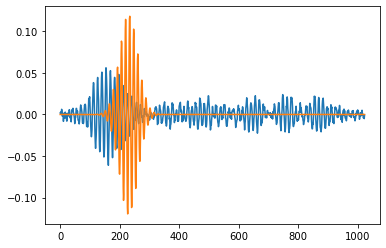

In [66]:
plt.plot(testout[3,:])
plt.plot(testng[3])

In [23]:
def getNonGaussian(t):
    # Signal with non-Gaussian shape
    freq = np.random.uniform(200,500)
    phase = np.random.uniform(0,2*np.pi)
    sigma = 0.03
    pos = np.random.uniform(3*sigma,1-3*sigma)
    ampl = np.random.uniform (0.1,0.2)
    rfi = ampl*np.cos(phase+freq*t)*np.exp(-(t-pos)**2/(2*sigma**2))
    return rfi

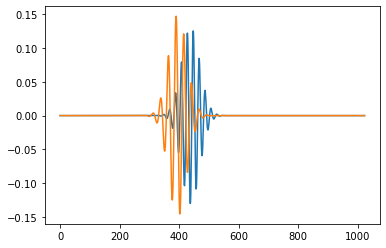

In [46]:
time = np.linspace(0,1,1024)
plt.plot(getNonGaussian(time))
plt.plot(t.getNonGaussianLocalized(sigma=(0.03,0.03)))